Here is the links for Expresso Customer Churn Prediction

Train dataset = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=Train.csv

Test dataset = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=Test.csv

Sample Submission = https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge?select=SampleSubmission.csv



**Problem** **Statement**


The objective of the EXpresso Customer Churn Prediction is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from Expresso.

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. Expresso offers a wide range of products and services to meet the needs of customers.

Variables Definition

The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

1.user_id

2.REGION    : the location of each client

3.TENURE    : duration in the network

4.MONTANT   : top-up amount

5.FREQUENCE_RECH : Â number of times the customer refilled

6.REVENUE   : monthly income of each client

7.ARPU_SEGMENT : income over 90 days / 3

8.FREQUENCE : number of times the client has made an income

9.DATA_VOLUME : number of connections

10.ON_NET : inter expresso call

11.ORANGE : call to orange

12.TIGO : call to Tigo

13.ZONE1 : call to zones1

14.ZONE2 : call to zones2

15.MRG : a client who is going 

16.REGULARITY : number of times the client is active for 90 days

17.TOP_PACK : he most active packs

18.FREQ_TOP_PACK : number of times the client has activated the top pack packages

19.CHURN : target variable to predict

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#Import some neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [52]:
#import datasets like train , test, sample submisssion
train = pd.read_csv('/content/drive/MyDrive/Train (4).csv',nrows=5600)
test=  pd.read_csv('/content/drive/MyDrive/Test (1).csv',nrows=2600)
submission = pd.read_csv('/content/drive/MyDrive/SampleSubmission (1).csv')

In [53]:
#printing the shape of the train,test datasets
print(train.shape)
print(test.shape)

(5600, 19)
(2600, 18)


In [54]:
#printing the first five rows of the train dataset
#by default head() will first five rows
#if you want first 10 rows you can use this "train.head(10)"
#so here indexing starts from "0"
train.head()

user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                        TOP_PACK  \
0    46.0   1.0    1.0    2.0  NO          54  On net 200F=Unlimited _call24H   
1     NaN   NaN    NaN    NaN  NO           4                             NaN   
2    46.0   7.0    NaN    NaN  NO          17         On-net 1000F=10MilF;10d   
3   102.0   2.0    NaN    NaN  NO          62               Data:1000F=5GB,7d   
4    24.0   NaN    NaN    NaN  NO          11     Mixt 250F=Unlimited_call24H   

   FREQ_TOP_PACK  CHURN  
0            8.0      0  
1            NaN      1  
2            1.0      0  
3           11.0      0  
4            2.0      0

In [55]:
#printing the last five rows of the train dataset
#by default tail() will first five rows
#if you want last 10 rows you can use this "train.tail(10)"
#so here indexing starts from "0"
train.tail()

user_id REGION        TENURE  MONTANT  \
5595  00ab66cc543fc027768ee2d9364b403dd594b448  DAKAR  K > 24 month    500.0   
5596  00ab6f5770acfa6dcce5bc6866926f292ea62e8f  DAKAR  K > 24 month  13000.0   
5597  00ab75232b997c60ce0e53688b460ddb9a0db74b  THIES  K > 24 month    700.0   
5598  00ab7ac21c09b8ecd5d7abaefaf93bf85b00d08f    NaN  K > 24 month      NaN   
5599  00aba45e0ae943d177cdbee6f835b16abe7d4849  DAKAR  K > 24 month      NaN   

      FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
5595             1.0   5040.0        1680.0        2.0          NaN    63.0   
5596            13.0  13005.0        4335.0       15.0      60341.0     4.0   
5597             1.0    700.0         233.0        2.0          0.0     0.0   
5598             NaN      NaN           NaN        NaN          NaN     0.0   
5599             NaN    500.0         167.0        3.0          NaN     NaN   

      ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
5595   181.0  29.0    NaN    NaN  NO          20   
5596    19.0   2.0    NaN    NaN  NO          61   
5597     4.0   NaN    NaN    NaN  NO           8   
5598     0.0   NaN    NaN    NaN  NO           4   
5599     4.0   NaN    NaN    NaN  NO           4   

                                TOP_PACK  FREQ_TOP_PACK  CHURN  
5595  All-net 5000= 20000off+20000on;30d            1.0      0  
5596                   Data:1000F=5GB,7d           13.0      0  
5597                VAS(IVR_Radio_Daily)            1.0      0  
5598                                 NaN            NaN      1  
5599                                 NaN            NaN      1

In [56]:
test.head(10)

user_id REGION         TENURE  MONTANT  \
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9  THIES   K > 24 month   5000.0   
1  000055d41c8a62052dd426592e8a4a3342bf565d    NaN  I 18-21 month    300.0   
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8  DAKAR   K > 24 month   3300.0   
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337    NaN   K > 24 month      NaN   
4  0000bae5480628cf8fe51ad84bcb39772fc79224    NaN   K > 24 month      NaN   
5  0000d5ec4e898355a5607fb327e621403c1d76f6    NaN   K > 24 month      NaN   
6  0000ecce03debd39b0703b24b8ce20b8c06f6bd4  DAKAR   K > 24 month   6500.0   
7  00010f65a5340264303727655cc554fdfd0da8f2  DAKAR   K > 24 month   1000.0   
8  000143f911b80a025ccd6a6e5425834b1ae17642  DAKAR   K > 24 month   4000.0   
9  0001488ec950d9b3502295d00f96099bc412030b  THIES   K > 24 month   3000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0             5.0   5000.0        1667.0        5.0          NaN   378.0   
1             2.0    326.0         109.0        3.0        397.0     NaN   
2            25.0   3400.0        1133.0       26.0       7150.0     0.0   
3             NaN      NaN           NaN        NaN          NaN     NaN   
4             NaN      NaN           NaN        NaN          NaN     NaN   
5             NaN      NaN           NaN        NaN          NaN     0.0   
6            12.0   7000.0        2333.0       13.0          NaN   338.0   
7             2.0   1000.0         333.0        2.0          NaN    74.0   
8             8.0   4000.0        1333.0       10.0          NaN     9.0   
9             5.0   3006.0        1002.0        8.0       4729.0     1.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0    11.0   5.0    NaN    NaN  NO          42   
1     0.0   NaN    NaN    NaN  NO          41   
2     2.0   5.0    NaN    NaN  NO          57   
3     NaN   NaN    NaN    NaN  NO           9   
4     NaN   NaN    NaN    NaN  NO          10   
5     NaN   NaN    NaN    NaN  NO          26   
6   122.0  25.0    NaN    NaN  NO          58   
7    15.0   3.0    NaN    NaN  NO          13   
8   106.0   5.0    NaN    NaN  NO          39   
9     1.0   NaN    NaN    NaN  NO          23   

                               TOP_PACK  FREQ_TOP_PACK  
0               On-net 1000F=10MilF;10d            5.0  
1                  Data: 100 F=40MB,24H            1.0  
2                  Data: 100 F=40MB,24H           22.0  
3                                   NaN            NaN  
4                                   NaN            NaN  
5                                   NaN            NaN  
6                 All-net 500F=2000F;5d            9.0  
7                 All-net 500F=2000F;5d            2.0  
8  All-net 500F =2000F_AllNet_Unlimited            7.0  
9                      Data:490F=1GB,7d            4.0

In [57]:
test.tail(10)

user_id       REGION         TENURE  \
2590  01b70c5a9be6057f8298454167973fbf1519a211  SAINT-LOUIS   K > 24 month   
2591  01b7127924324b500d77a42c8f045d6030f32f44  SAINT-LOUIS  J 21-24 month   
2592  01b78f15fd312d00d1c7dda52ffc4cd19412827c          NaN   K > 24 month   
2593  01b7ab1ef1de5d18d4c2d716b4641fff4d2c7dcc        THIES   K > 24 month   
2594  01b80c469d5d1b533718db6fbf1330ab97a0a499     DIOURBEL   K > 24 month   
2595  01b81614cb0b7b3423d586217d1ee242f52c7edd        MATAM   K > 24 month   
2596  01b83a7dfbc3920907711cdbe43a61ee2f4f4580        LOUGA   K > 24 month   
2597  01b8a6e7c2a034d0b51ec7a548a2f1328ed76686        DAKAR   K > 24 month   
2598  01b8ab98c0e9205bd41bcb4ab26adbec0bdb8f87        LOUGA   K > 24 month   
2599  01b8e7d8597321ab871b02d2669f31c3d25e4213          NaN   K > 24 month   

      MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
2590  24500.0            83.0  25890.0        8630.0       84.0         10.0   
2591   6000.0            12.0   6500.0        2167.0       13.0          NaN   
2592      NaN             NaN      NaN           NaN        NaN        432.0   
2593  11000.0            25.0  12500.0        4167.0       31.0          0.0   
2594   4800.0            11.0   4790.0        1597.0       14.0       7912.0   
2595   1000.0             2.0   1001.0         334.0        2.0          0.0   
2596   1000.0             2.0   1489.0         496.0        9.0          NaN   
2597      NaN             NaN      NaN           NaN        NaN          NaN   
2598    500.0             1.0    500.0         167.0        1.0          0.0   
2599    400.0             2.0    400.0         133.0        2.0          NaN   

      ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
2590  4951.0   143.0  11.0    NaN    NaN  NO          62   
2591   285.0     1.0   NaN    NaN    NaN  NO          57   
2592    18.0     NaN   NaN    NaN    NaN  NO          13   
2593  1214.0    18.0   1.0    NaN    NaN  NO          62   
2594     8.0    14.0   0.0    NaN    NaN  NO          52   
2595    11.0    52.0   NaN    2.0    NaN  NO          52   
2596    35.0     NaN   NaN    NaN    NaN  NO          29   
2597     NaN     NaN   NaN    NaN    NaN  NO           9   
2598    18.0     1.0   8.0    NaN    NaN  NO           6   
2599     3.0     NaN   NaN    NaN    NaN  NO          24   

                            TOP_PACK  FREQ_TOP_PACK  
2590  On net 200F=Unlimited _call24H           72.0  
2591             On-net 500=4000,10d           13.0  
2592                             NaN            NaN  
2593  On net 200F=Unlimited _call24H           11.0  
2594                Data:490F=1GB,7d            8.0  
2595           All-net 500F=2000F;5d            2.0  
2596                             NaN            NaN  
2597                             NaN            NaN  
2598           All-net 500F=2000F;5d            1.0  
2599             On-net 200F=60mn;1d            2.0

In [58]:
#describing statistical analysis on train data
train.describe()
#another method to describe including null values and all columns of statistical analysis
#train.describe(include = "all")

MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT    FREQUENCE  \
count   3631.000000     3631.000000   3693.000000   3693.000000  3693.000000   
mean    5389.320848       11.213164   5385.562415   1795.196588    13.632006   
std     6900.116288       12.779579   6941.404329   2313.791684    14.144806   
min       50.000000        1.000000      1.000000      0.000000     1.000000   
25%     1000.000000        2.000000   1000.000000    333.000000     3.000000   
50%     3000.000000        6.000000   2990.000000    997.000000     9.000000   
75%     7100.000000       15.000000   7291.000000   2430.000000    19.000000   
max    91500.000000       92.000000  93195.000000  31065.000000    83.000000   

         DATA_VOLUME        ON_NET       ORANGE         TIGO       ZONE1  \
count    2795.000000   3545.000000  3239.000000  2232.000000  436.000000   
mean     3880.794275    274.248801    92.743439    22.036290    9.091743   
std     25619.394315    861.189083   195.905416    55.348916   47.852127   
min         0.000000      0.000000     0.000000     0.000000    0.000000   
25%         0.000000      5.000000     7.000000     2.000000    0.000000   
50%       300.000000     26.000000    29.000000     6.000000    1.000000   
75%      2752.500000    148.000000    96.000000    21.000000    3.000000   
max    926547.000000  11987.000000  3280.000000  1374.000000  820.000000   

            ZONE2   REGULARITY  FREQ_TOP_PACK        CHURN  
count  351.000000  5600.000000    3237.000000  5600.000000  
mean     9.746439    27.716071       8.981464     0.185179  
std     54.535138    22.282132      11.409001     0.388477  
min      0.000000     1.000000       1.000000     0.000000  
25%      0.000000     6.000000       2.000000     0.000000  
50%      1.000000    24.000000       5.000000     0.000000  
75%      5.000000    50.000000      11.000000     0.000000  
max    932.000000    62.000000     120.000000     1.000000

In [59]:
#below code will explain about how much memory usage has been used.datatypes of particuar columns and how many int,floats,objects are there.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         5600 non-null   object 
 1   REGION          3410 non-null   object 
 2   TENURE          5600 non-null   object 
 3   MONTANT         3631 non-null   float64
 4   FREQUENCE_RECH  3631 non-null   float64
 5   REVENUE         3693 non-null   float64
 6   ARPU_SEGMENT    3693 non-null   float64
 7   FREQUENCE       3693 non-null   float64
 8   DATA_VOLUME     2795 non-null   float64
 9   ON_NET          3545 non-null   float64
 10  ORANGE          3239 non-null   float64
 11  TIGO            2232 non-null   float64
 12  ZONE1           436 non-null    float64
 13  ZONE2           351 non-null    float64
 14  MRG             5600 non-null   object 
 15  REGULARITY      5600 non-null   int64  
 16  TOP_PACK        3237 non-null   object 
 17  FREQ_TOP_PACK   3237 non-null   f

In [60]:
#Checking null values in train dataset
train.isnull().sum()

user_id              0
REGION            2190
TENURE               0
MONTANT           1969
FREQUENCE_RECH    1969
REVENUE           1907
ARPU_SEGMENT      1907
FREQUENCE         1907
DATA_VOLUME       2805
ON_NET            2055
ORANGE            2361
TIGO              3368
ZONE1             5164
ZONE2             5249
MRG                  0
REGULARITY           0
TOP_PACK          2363
FREQ_TOP_PACK     2363
CHURN                0
dtype: int64

In [61]:
#checking null values in test data
test.isnull().sum()

user_id              0
REGION             998
TENURE               0
MONTANT            915
FREQUENCE_RECH     915
REVENUE            874
ARPU_SEGMENT       874
FREQUENCE          874
DATA_VOLUME       1277
ON_NET             974
ORANGE            1094
TIGO              1562
ZONE1             2382
ZONE2             2437
MRG                  0
REGULARITY           0
TOP_PACK          1092
FREQ_TOP_PACK     1092
dtype: int64

These are categorical features in our train data

In [62]:
#Here are the some categorical features('region') which we will check the how many categories are there and respective counts
print(train['REGION'].value_counts())

DAKAR          1321
THIES           473
SAINT-LOUIS     325
LOUGA           243
KAOLACK         239
DIOURBEL        178
TAMBACOUNDA     139
KAFFRINE        120
FATICK          109
KOLDA           102
MATAM            85
ZIGUINCHOR       69
SEDHIOU           7
Name: REGION, dtype: int64


In [63]:
#Here are the some categorical features('TENURE') which we will check the how many categories are there and respective counts
print(train['TENURE'].value_counts())

K > 24 month     5328
I 18-21 month     109
H 15-18 month      61
G 12-15 month      46
J 21-24 month      28
F 9-12 month       18
E 6-9 month         6
D 3-6 month         4
Name: TENURE, dtype: int64


In [64]:
#Here are the some categorical features('MRG') which we will check the how many categories are there and respective counts
print(train['MRG'].value_counts())

NO    5600
Name: MRG, dtype: int64


In [65]:
#Here are the some categorical features('CHURN') which we will check the how many categories are there and respective counts
print(train['CHURN'].value_counts())

0    4563
1    1037
Name: CHURN, dtype: int64


VISUALIZATIONS

Text(0.5, 0, 'REGION')

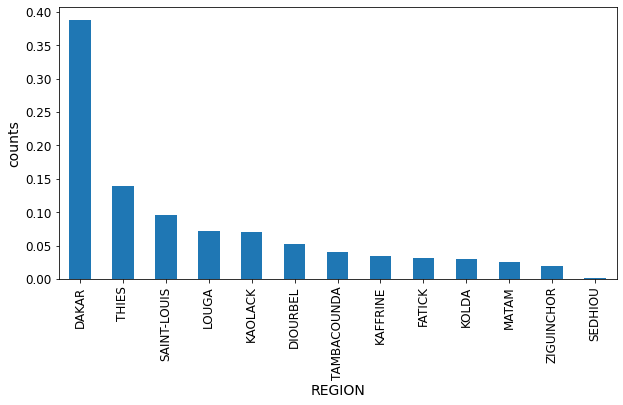

In [66]:
#These are some visualizations of categorical variables 
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

Text(0.5, 0, 'TENURE')

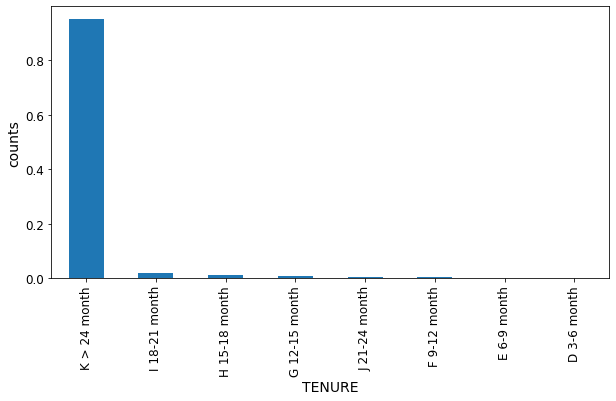

In [67]:
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

Text(0.5, 0, 'MRG')

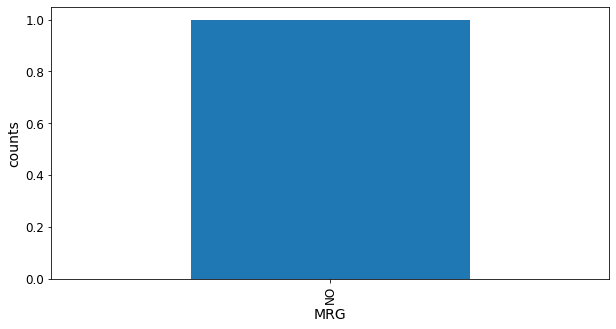

In [68]:
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

Text(0.5, 0, 'Churn')

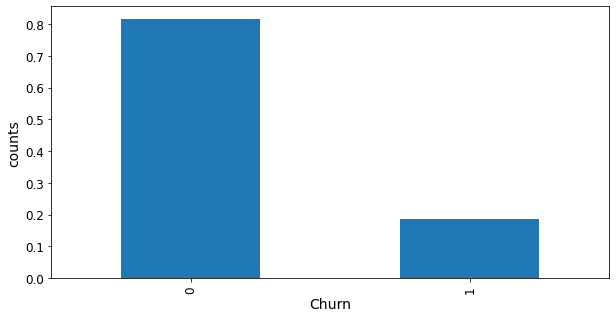

In [69]:
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

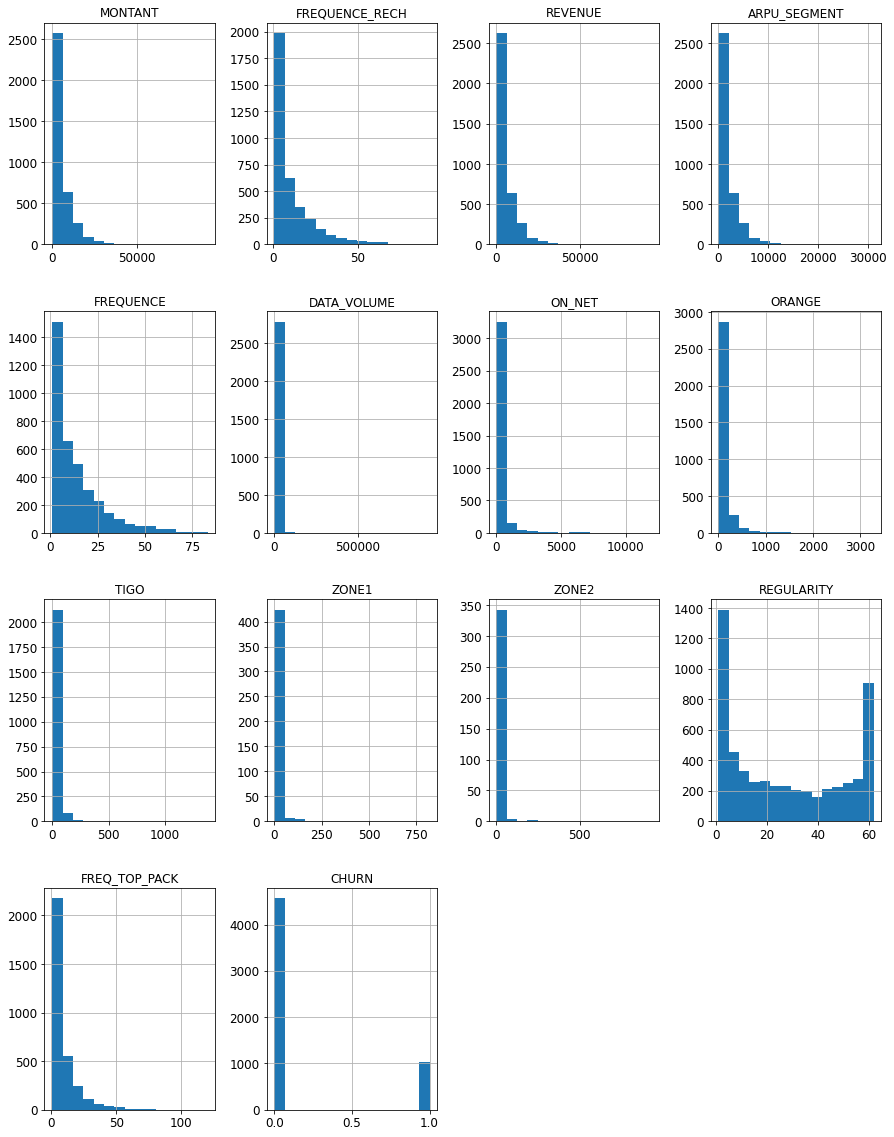

In [70]:
#Here is the code for numerical column sof visualizations
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

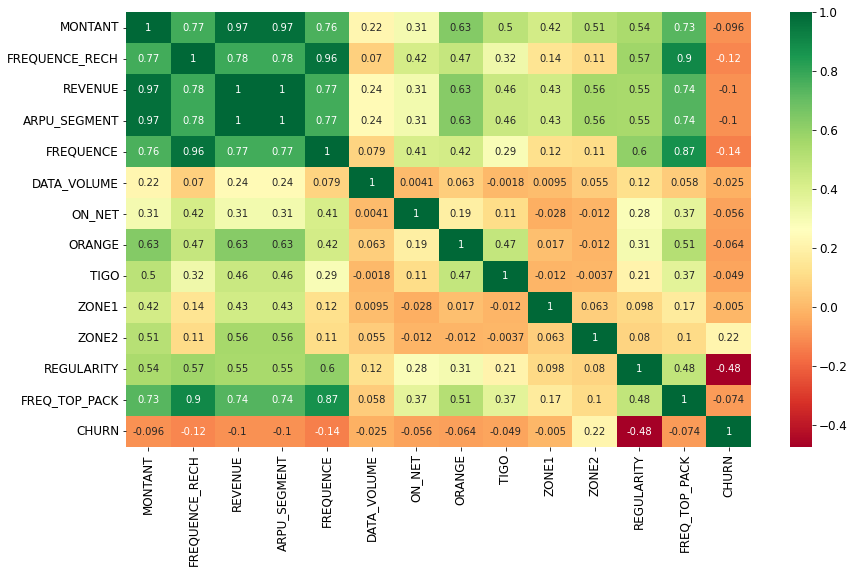

In [71]:
#correlation matrix will help us  to check the correlation between the variables
corrmat= train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
#filling null values of train data using mean 
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [73]:
#checking filled null values or not 
train.head()

user_id  REGION         TENURE  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   

        MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT  FREQUENCE  \
0   4250.000000       15.000000   4251.000000   1417.000000  17.000000   
1   5389.320848       11.213164   5385.562415   1795.196588  13.632006   
2   3600.000000        2.000000   1020.000000    340.000000   2.000000   
3  13500.000000       15.000000  13502.000000   4501.000000  18.000000   
4   1000.000000        1.000000    985.000000    328.000000   1.000000   

    DATA_VOLUME      ON_NET      ORANGE      TIGO     ZONE1     ZONE2 MRG  \
0      4.000000  388.000000   46.000000   1.00000  1.000000  2.000000  NO   
1   3880.794275  274.248801   92.743439  22.03629  9.091743  9.746439  NO   
2   3880.794275   90.000000   46.000000   7.00000  9.091743  9.746439  NO   
3  43804.000000   41.000000  102.000000   2.00000  9.091743  9.746439  NO   
4   3880.794275   39.000000   24.000000  22.03629  9.091743  9.746439  NO   

   REGULARITY                        TOP_PACK  FREQ_TOP_PACK  CHURN  
0          54  On net 200F=Unlimited _call24H       8.000000      0  
1           4                             NaN       8.981464      1  
2          17         On-net 1000F=10MilF;10d       1.000000      0  
3          62               Data:1000F=5GB,7d      11.000000      0  
4          11     Mixt 250F=Unlimited_call24H       2.000000      0

In [74]:
#dropped columns because its useless columns
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [75]:
#checking null values is there any where of train data
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [76]:
#filling null values of test data using mean
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [77]:
test.head()

user_id         TENURE      MONTANT  \
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9   K > 24 month  5000.000000   
1  000055d41c8a62052dd426592e8a4a3342bf565d  I 18-21 month   300.000000   
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8   K > 24 month  3300.000000   
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337   K > 24 month  5330.094955   
4  0000bae5480628cf8fe51ad84bcb39772fc79224   K > 24 month  5330.094955   

   FREQUENCE_RECH      REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0        5.000000  5000.000000   1667.000000   5.000000   3127.42706   
1        2.000000   326.000000    109.000000   3.000000    397.00000   
2       25.000000  3400.000000   1133.000000  26.000000   7150.00000   
3       11.301484  5289.962341   1763.327346  13.621089   3127.42706   
4       11.301484  5289.962341   1763.327346  13.621089   3127.42706   

       ON_NET     ORANGE       TIGO     ZONE1     ZONE2  REGULARITY  \
0  378.000000  11.000000   5.000000  6.655963  6.276074          42   
1  276.051046   0.000000  21.522158  6.655963  6.276074          41   
2    0.000000   2.000000   5.000000  6.655963  6.276074          57   
3  276.051046  97.851262  21.522158  6.655963  6.276074           9   
4  276.051046  97.851262  21.522158  6.655963  6.276074          10   

   FREQ_TOP_PACK  
0       5.000000  
1       1.000000  
2      22.000000  
3       8.897215  
4       8.897215

In [78]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [79]:
#taking separate numerical columns
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [80]:
#we are doing standarization of numerical columns to the train data
from sklearn.preprocessing import StandardScaler
st = StandardScaler() 
train[num_cols] = st.fit_transform(train[num_cols])

In [81]:
train[num_cols] 

MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT  FREQUENCE  \
0    -2.050833e-01        0.368045 -2.013002e-01     -0.201306   0.293250   
1     1.637135e-16        0.000000 -1.613675e-16      0.000000   0.000000   
2    -3.220865e-01       -0.895433 -7.745617e-01     -0.774570  -1.012793   
3     1.459962e+00        0.368045  1.440062e+00      1.440241   0.380319   
4    -7.900992e-01       -0.992623 -7.807716e-01     -0.780957  -1.099863   
...            ...             ...           ...           ...        ...   
5595 -8.801016e-01       -0.992623 -6.131155e-02     -0.061317  -1.012793   
5596  1.369959e+00        0.173664  1.351882e+00      1.351883   0.119111   
5597 -8.441007e-01       -0.992623 -8.313378e-01     -0.831524  -1.012793   
5598  1.637135e-16        0.000000 -1.613675e-16      0.000000   0.000000   
5599  1.637135e-16        0.000000 -8.668229e-01     -0.866654  -0.925724   

      DATA_VOLUME        ON_NET        ORANGE      TIGO     ZONE1    ZONE2  \
0       -0.214232  1.660369e-01 -3.137833e-01 -0.602149 -0.606723 -0.56818   
1        0.000000 -8.297148e-17 -9.539582e-17  0.000000  0.000000  0.00000   
2        0.000000 -2.689387e-01 -3.137833e-01 -0.430404  0.000000  0.00000   
3        2.206162 -3.404615e-01  6.213822e-02 -0.573525  0.000000  0.00000   
4        0.000000 -3.433808e-01 -4.614667e-01  0.000000  0.000000  0.00000   
...           ...           ...           ...       ...       ...      ...   
5595     0.000000 -3.083492e-01  5.924561e-01  0.199331  0.000000  0.00000   
5596     3.119999 -3.944686e-01 -4.950312e-01 -0.573525  0.000000  0.00000   
5597    -0.214453 -4.003072e-01 -5.957244e-01  0.000000  0.000000  0.00000   
5598     0.000000 -4.003072e-01 -6.225760e-01  0.000000  0.000000  0.00000   
5599     0.000000 -8.297148e-17 -5.957244e-01  0.000000  0.000000  0.00000   

      REGULARITY  FREQ_TOP_PACK  
0       1.179702  -1.131662e-01  
1      -1.064449  -2.048200e-16  
2      -0.480970  -9.202901e-01  
3       1.538766   2.327441e-01  
4      -0.750268  -8.049867e-01  
...          ...            ...  
5595   -0.346321  -9.202901e-01  
5596    1.493883   4.633509e-01  
5597   -0.884917  -9.202901e-01  
5598   -1.064449  -2.048200e-16  
5599   -1.064449  -2.048200e-16  

[5600 rows x 13 columns]

In [82]:
# standarising the numerical columns using test data.the difference is we are just transforming
test[num_cols] = st.transform(test[num_cols])

In [83]:
#checking the columns all are stanadarised or not
test[num_cols]

MONTANT  FREQUENCE_RECH   REVENUE  ARPU_SEGMENT  FREQUENCE  \
0    -0.070080       -0.603861 -0.068409     -0.068236  -0.751585   
1    -0.916103       -0.895433 -0.897695     -0.897526  -0.925724   
2    -0.376088        1.339951 -0.352289     -0.352473   1.076875   
3    -0.010661        0.008584 -0.016962     -0.016963  -0.000951   
4    -0.010661        0.008584 -0.016962     -0.016963  -0.000951   
...        ...             ...       ...           ...        ...   
2595 -0.790099       -0.895433 -0.777933     -0.777764  -1.012793   
2596 -0.790099       -0.895433 -0.691349     -0.691534  -0.403307   
2597 -0.010661        0.008584 -0.016962     -0.016963  -0.000951   
2598 -0.880102       -0.992623 -0.866823     -0.866654  -1.099863   
2599 -0.898102       -0.895433 -0.884565     -0.884751  -1.012793   

      DATA_VOLUME    ON_NET    ORANGE      TIGO     ZONE1     ZONE2  \
0       -0.041631  0.151440 -0.548734 -0.487652 -0.182636 -0.254542   
1       -0.192515  0.002631 -0.622576 -0.014717 -0.182636 -0.254542   
2        0.180657 -0.400307 -0.609150 -0.487652 -0.182636 -0.254542   
3       -0.041631  0.002631  0.034288 -0.014717 -0.182636 -0.254542   
4       -0.041631  0.002631  0.034288 -0.014717 -0.182636 -0.254542   
...           ...       ...       ...       ...       ...       ...   
2595    -0.214453 -0.384251 -0.273506 -0.014717 -0.531742 -0.254542   
2596    -0.041631 -0.349219  0.034288 -0.014717 -0.182636 -0.254542   
2597    -0.041631  0.002631  0.034288 -0.014717 -0.182636 -0.254542   
2598    -0.214453 -0.374033 -0.615863 -0.401779 -0.182636 -0.254542   
2599    -0.041631 -0.395928  0.034288 -0.014717 -0.182636 -0.254542   

      REGULARITY  FREQ_TOP_PACK  
0       0.641106      -0.459076  
1       0.596223      -0.920290  
2       1.314351       1.501082  
3      -0.840034      -0.009714  
4      -0.795151      -0.009714  
...          ...            ...  
2595    1.089936      -0.804987  
2596    0.057627      -0.009714  
2597   -0.840034      -0.009714  
2598   -0.974683      -0.920290  
2599   -0.166788      -0.804987  

[2600 rows x 13 columns]

In [84]:
test.head()

user_id         TENURE   MONTANT  \
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9   K > 24 month -0.070080   
1  000055d41c8a62052dd426592e8a4a3342bf565d  I 18-21 month -0.916103   
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8   K > 24 month -0.376088   
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337   K > 24 month -0.010661   
4  0000bae5480628cf8fe51ad84bcb39772fc79224   K > 24 month -0.010661   

   FREQUENCE_RECH   REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME    ON_NET  \
0       -0.603861 -0.068409     -0.068236  -0.751585    -0.041631  0.151440   
1       -0.895433 -0.897695     -0.897526  -0.925724    -0.192515  0.002631   
2        1.339951 -0.352289     -0.352473   1.076875     0.180657 -0.400307   
3        0.008584 -0.016962     -0.016963  -0.000951    -0.041631  0.002631   
4        0.008584 -0.016962     -0.016963  -0.000951    -0.041631  0.002631   

     ORANGE      TIGO     ZONE1     ZONE2  REGULARITY  FREQ_TOP_PACK  
0 -0.548734 -0.487652 -0.182636 -0.254542    0.641106      -0.459076  
1 -0.622576 -0.014717 -0.182636 -0.254542    0.596223      -0.920290  
2 -0.609150 -0.487652 -0.182636 -0.254542    1.314351       1.501082  
3  0.034288 -0.014717 -0.182636 -0.254542   -0.840034      -0.009714  
4  0.034288 -0.014717 -0.182636 -0.254542   -0.795151      -0.009714

In [85]:
#we are label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [86]:
train["TENURE"] = le.fit_transform(train["TENURE"])

In [87]:
test["TENURE"] = le.fit_transform(test["TENURE"])

In [88]:
train.head()

user_id  TENURE       MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596       7 -2.050833e-01   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834       5  1.637135e-16   
2  00001654a9d9f96303d9969d0a4a851714a4bb57       7 -3.220865e-01   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2       7  1.459962e+00   
4  000028d9e13a595abe061f9b58f3d76ab907850f       7 -7.900992e-01   

   FREQUENCE_RECH       REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0        0.368045 -2.013002e-01     -0.201306   0.293250    -0.214232   
1        0.000000 -1.613675e-16      0.000000   0.000000     0.000000   
2       -0.895433 -7.745617e-01     -0.774570  -1.012793     0.000000   
3        0.368045  1.440062e+00      1.440241   0.380319     2.206162   
4       -0.992623 -7.807716e-01     -0.780957  -1.099863     0.000000   

         ON_NET        ORANGE      TIGO     ZONE1    ZONE2  REGULARITY  \
0  1.660369e-01 -3.137833e-01 -0.602149 -0.606723 -0.56818    1.179702   
1 -8.297148e-17 -9.539582e-17  0.000000  0.000000  0.00000   -1.064449   
2 -2.689387e-01 -3.137833e-01 -0.430404  0.000000  0.00000   -0.480970   
3 -3.404615e-01  6.213822e-02 -0.573525  0.000000  0.00000    1.538766   
4 -3.433808e-01 -4.614667e-01  0.000000  0.000000  0.00000   -0.750268   

   FREQ_TOP_PACK  CHURN  
0  -1.131662e-01      0  
1  -2.048200e-16      1  
2  -9.202901e-01      0  
3   2.327441e-01      0  
4  -8.049867e-01      0

In [89]:
test.head()

user_id  TENURE   MONTANT  FREQUENCE_RECH  \
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9       7 -0.070080       -0.603861   
1  000055d41c8a62052dd426592e8a4a3342bf565d       5 -0.916103       -0.895433   
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8       7 -0.376088        1.339951   
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337       7 -0.010661        0.008584   
4  0000bae5480628cf8fe51ad84bcb39772fc79224       7 -0.010661        0.008584   

    REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME    ON_NET    ORANGE  \
0 -0.068409     -0.068236  -0.751585    -0.041631  0.151440 -0.548734   
1 -0.897695     -0.897526  -0.925724    -0.192515  0.002631 -0.622576   
2 -0.352289     -0.352473   1.076875     0.180657 -0.400307 -0.609150   
3 -0.016962     -0.016963  -0.000951    -0.041631  0.002631  0.034288   
4 -0.016962     -0.016963  -0.000951    -0.041631  0.002631  0.034288   

       TIGO     ZONE1     ZONE2  REGULARITY  FREQ_TOP_PACK  
0 -0.487652 -0.182636 -0.254542    0.641106      -0.459076  
1 -0.014717 -0.182636 -0.254542    0.596223      -0.920290  
2 -0.487652 -0.182636 -0.254542    1.314351       1.501082  
3 -0.014717 -0.182636 -0.254542   -0.840034      -0.009714  
4 -0.014717 -0.182636 -0.254542   -0.795151      -0.009714

In [90]:
#we are deleting unique columns and target column and sepaarting independent and dependent variabes
X=train.drop(['user_id','CHURN'],axis=1)
y=train['CHURN']
test = test.drop(columns=['user_id'], axis=1)

In [91]:
y

0       0
1       1
2       0
3       0
4       0
       ..
5595    0
5596    0
5597    0
5598    1
5599    1
Name: CHURN, Length: 5600, dtype: int64

In [92]:
#we are importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Model Building

In [93]:
model_df={}
def model_val(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

  score = cross_val_score(model,X,y,cv=5)
  print(f"{model} avg cross_val_score is {np.mean(score)}")
  model_df[model] = round(np.mean(score)*100,2)

In [94]:
#building decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y) 

DecisionTreeClassifier() accuracy is 0.8357142857142857
DecisionTreeClassifier() avg cross_val_score is 0.8417857142857142


In [95]:
#building randomforest algorithm
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.8607142857142858
RandomForestClassifier() avg cross_val_score is 0.8651785714285714


In [96]:
RandomForestClassifier()

RandomForestClassifier()

In [99]:
#hyperparameter tuning on RandomizedSearchCV
rf_grid = {'n_estimators':np.arange(10,1000,10),
    'max_features':['auto','sqrt'],
    'max_depth':[None,3,5,10,20,30],
    'min_samples_split':[2,5,20,50,100],
    'min_samples_leaf':[1,2,5,10]}

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

In [105]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [106]:
rs_rf.best_score_

0.8714285714285716

In [107]:
rs_rf.best_params_

{'n_estimators': 570,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': None}